<a href="https://colab.research.google.com/github/ajeworld/3Scenes-NN/blob/main/FCA_Reduction_Dimention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import sklearn.datasets
!pip install factor_analyzer  
from factor_analyzer import FactorAnalyzer
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [165]:
dataset= pd.read_csv("data_cancer.csv")

In [166]:
dataset.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [167]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [168]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [170]:
x = dataset[['radius_mean', 'perimeter_mean', 'area_mean', 'radius_worst', 'perimeter_worst']]
y = dataset['diagnosis'].copy()

In [171]:
dataset= pd.read_csv("data_cancer.csv")
dataset = dataset.drop(columns=['Unnamed: 32'])
x = dataset[['radius_mean', 'perimeter_mean', 'area_mean', 'radius_worst', 'perimeter_worst']]
y = dataset['diagnosis'].replace(['M','B'],[1, 0]).copy()
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [172]:
from sklearn.decomposition import FactorAnalysis
fact_an = FactorAnalysis(n_components=2)
x_factor = fact_an.fit_transform(x)

In [173]:
 from sklearn.model_selection import train_test_split
 x_train_fa,x_test_fa,y_train_fa,y_test_fa=train_test_split(x_factor,y,test_size=0.2)

In [174]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential()

input_layer = keras.layers.Dense(8,input_dim=2,activation='tanh')
model.add(input_layer)
hidden_layer = keras.layers.Dense(3,activation='sigmoid')
model.add(hidden_layer)
output_layer = keras.layers.Dense(1, activation='sigmoid')
model.add(output_layer)

sgd  = keras.optimizers.SGD(lr=1)
model.compile(optimizer=sgd,loss='binary_crossentropy')

In [200]:
model.fit(x_train_fa, y_train_fa,
          epochs=100,
          steps_per_epoch=10)

Epoch 1/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0671
Epoch 2/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0673
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0666
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0678
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0670
Epoch 6/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0665
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0672
Epoch 8/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0727
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0693
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0671
Epoch 11/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0684
Epoch 12/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0675
Epoch 13/100
10/10 [=================

In [201]:
score_fa = model.evaluate(x_test_fa, y_test_fa, verbose=0)
print(score_fa)

0.17885658144950867


In [214]:
# Membagi data ke test dan training set
from sklearn.model_selection import train_test_split
x_train_fa,x_val_and_test_fa,y_train_fa,y_val_and_test_fa=train_test_split(principalDf2,y2,test_size=0.25, random_state = 0)
x_val_fa, x_test_fa, y_val_fa, y_test_fa = train_test_split(x_val_and_test_fa, y_val_and_test_fa, test_size=0.5)
print(x_train_fa.shape, x_val_fa.shape, x_test_fa.shape, y_train_fa.shape, y_val_fa.shape, y_test_fa.shape)


(426, 2) (71, 2) (72, 2) (426,) (71,) (72,)


In [215]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential()

input_layer = keras.layers.Dense(8,input_dim=2,activation='tanh')
model.add(input_layer)
hidden_layer = keras.layers.Dense(3,activation='sigmoid')
model.add(hidden_layer)
output_layer = keras.layers.Dense(1, activation='sigmoid')
model.add(output_layer)

sgd  = keras.optimizers.SGD(lr=1)
model.compile(optimizer=sgd,loss='binary_crossentropy',metrics=['accuracy'])

In [222]:
H = model.fit(x_train_fa, y_train_fa,
          epochs=100,
          steps_per_epoch=10,
          validation_data=(x_val_fa, y_val_fa))

Epoch 1/100
10/10 [==============================] - 0s 12ms/step - loss: 0.1493 - accuracy: 0.9460 - val_loss: 0.1656 - val_accuracy: 0.9155
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 0.1561 - accuracy: 0.9437 - val_loss: 0.1391 - val_accuracy: 0.9437
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 0.1465 - accuracy: 0.9460 - val_loss: 0.1527 - val_accuracy: 0.9437
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 0.1465 - accuracy: 0.9507 - val_loss: 0.1752 - val_accuracy: 0.9155
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 0.1451 - accuracy: 0.9484 - val_loss: 0.1588 - val_accuracy: 0.9296
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.1464 - accuracy: 0.9484 - val_loss: 0.1424 - val_accuracy: 0.9437
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 0.1485 - accuracy: 0.9460 - val_loss: 0.1369 - val_accuracy: 0.9437
Epoch 8/100


In [224]:
model.evaluate(x_test_fa, y_test_fa)

3/3 [==============================] - 0s 3ms/step - loss: 0.1687 - accuracy: 0.9167


[0.16871920228004456, 0.9166666865348816]

In [218]:
import matplotlib.pyplot as plt

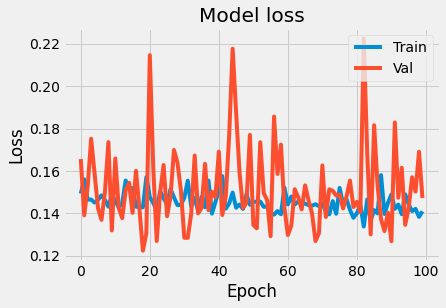

In [225]:
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

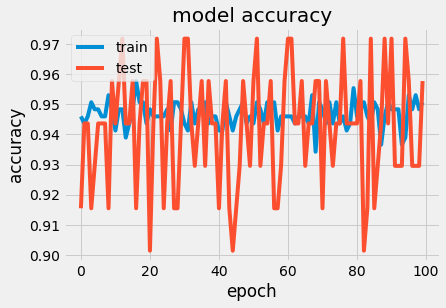

In [226]:
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

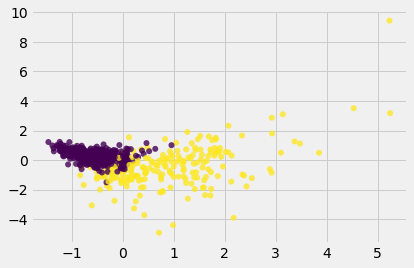

In [203]:
plt.scatter(x_factor[:,0],x_factor[:,1],c=y,alpha=.8,edgecolors='none')